# ADP 실기 대비 알고리즘 정리
***
## 해당 파일은 정형 데이터 마이닝에 사용되는 알고리즘(모델)들의 특징을 정리한 것입니다.


#### 1. SVM
#### 2. DecisionTree
#### 3. RandomForest
#### 4. GradientBoosting
#### 5. LightGBM
#### 6. XGBoost
#### 7. Naive Bayes
#### 8. KNN
#### 9 Voting
#### 10. Stacking
***

### 1. SVM(서포트 벡터 머신)

#### 1-1. 분류

서포트 벡터 머신은 선형이나 비선형 분류, 회귀, 이상치 탐색에 사용할 수 있는 다목적 머신러닝 모델이다. 복잡한 분류 문제에 특히 유용하며 작거나 중간 크기의 데이터에 적합하다. 또한 서포트 벡터 머신은 비확률적 이진 선형 분류 모델을 생성한다. 

**< 장점 >**
- 분류와 예측에 모두 사용 가능하다.
- 신경망 기법에 비해 과적합 정도가 낮다.
- 예측의 정확도가 높다.
- 저차원과 고차원의 데이터에 대해 모두 잘 작동한다.

**< 단점 >**
- 전처리와 파라미터에 따라 정확도가 달라진다.
- 예측이 어떻게 이루어지는지에 대한 이해와 모델에 대한 해석이 어렵다.
- 대용량 데이터에 대한 모형 구축시 속도가 느리며 메모리 할당량이 크다.

**< 용어 >**
- 초평면 : 각 그룹을 구분하는 분류자
- 서포트 벡터 : 각 그룹에 속한 데이터 중에서도 초평면에 가장 가까이에 붙어있는 최전방 데이터들
- 마진 : 서포트 벡터와 초평면 사이의 수직거리

선형 SVM 분류는 클래스 사이의 경계의 폭이 가장 넓은 기준선을 찾는 것으로 **라지 마진 분류**라고도 한다. 기준선 주변에 새로운 데이터를 추가해도 전혀 영향을 끼치지 않는다. 이런 샘플들을 **서포트 벡터**라고 한다.즉 SVM은 데이터들간의 벡터 거리를 측정했을 때 그 거리가 최대가 되는 분류자를 찾아나간다. 

- SVM은 특성의 **스케일링**에 민감하다. scaler를 활용할 경우 결정 경계가 훨씬 좋아진다.

모든 데이터가 경계선 바깥에 올바르게 분류 되어 있다면 **하드 마진 분류**라고 한다. 마진은 결정경계과 서포트 벡터 사이의 거리를 의미한다. 하드 마진 분류에서는 두가지 문제점이 존재한다. 

- 1. 데이터가 선형적으로 구분될 수 있어야 한다.
- 2. 이상치에 민감하다.

이런 문제를 피하려면 클래스 간의 결정선을 넓게 유지하는 것과 **마진 오류**(샘플이 결정선 중간이나 반대쪽에 있는 경우) 사이에 적절한 균형을 잡아야 하는데 이를 **소프트 마진 분류**라고 한다.

SVM 모델은 **C** 파라미터를 사용해 이 균형을 조절한다. C 값을 줄이면 결정선의 폭이 넓어지지만 마진 오류도 커진다. 

- SVM은 클래스에 대한 확률을 제공하지 않는다.

선형 SVM 분류기가 효율적이고 많은 경우에 아주 잘 작동하지만 선형적으로 분류할 수 없는 데이터셋이 많다. 비선형 데이터를 다루는 방법은 **다항 특성**과 같은 특성을 추가하는 것이다. 

다항식 특성을 추가하는 것은 간단하고 대부분 머신러닝 알고리즘에서 잘 작동하지만 낮은 차수는 복잡한 데이터를 잘 표현하지 못하고 높은 차수는 모델의 과적합이나 속도를 느리게 만든다.

이 때 SVM은 **커널 트릭**을 사용해 실제로 특성을 추가하지는 않지만 특성을 추가한 것과 같은 결과를 얻을 수 있다. 

비선형 특성을 다루는 또 다른 기법은 각 샘플이 특정 **랜드마크**와 얼마나 닮았는지 측정하는 **유사도 함수**로 계산한 특성을 추가하는 것이다. 

다항 특성 방시과 마찬가지로 커널 트릭을 사용해 유사도 특성을 추가할 수 있다. 

- 대체적으로 **LinearSVC**가 **SVC(kernel = 'linear')** 보다 훨씬 빠르다. 훈련 데이터가 아주 크거나 특성 수가 많을 때 그렇고 훈련 데이터가 너무 크지 않다면 **가우시안 RBF 커널**을 시도하는 것도 좋다.

SVM 알고리즘으로 회귀에 적용할 수 있는데 이 때 일정한 마진 오류 안에서 가능한 많은 샘플이 들어가도록 학습한다. 마진 안에서는 훈련 데이터가 추가되어도 모델의 예측에는 영향이 없다. 그래서 이 모델을 **마진에 민감하지 않다**라고 한다.

- SVR은 SVC의 회귀 버전이고 LinearSVR은 LinearSVC의 회귀 버전이다. 
- LinearSVR은 수행 시간이 훈련 데이터 크기에 비례해서 선형적으로 늘어난다. 하지만 SVR은 훈련 데이터가 커지면 훨씬 느려진다.
***

In [2]:
from IPython.display import Image

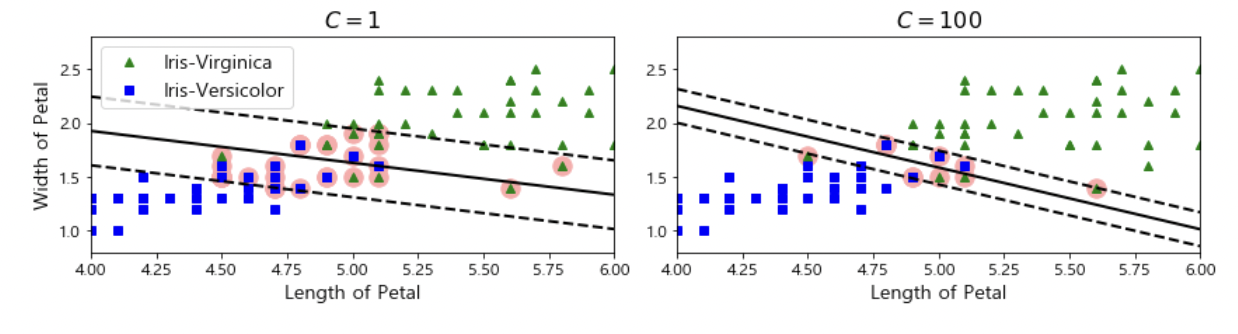

In [3]:
Image('svm_c.png')

점선으로부터 결정경계까지의 거리가 **마진**이다. n개의 속성을 가진 데이터는 최소 n+1개의 서포트 벡터가 존재한다. SVM에서는 결정 경계를 정의하는 게 결국 서포트 벡터이기 때문에 데이터 포인트 중에서 서포트 벡터만 잘 골라내면 나머지 쓸 데 없는 수많은 데이터 포인트들을 무시할 수 있다. 그래서 매우 빠르다.

#### <파라미터>
- C : 클수록 하드마진(오류 허용 안함), 작을수록 소프트마진(오류를 허용함)
- gamma : 결정경계를 얼마나 유연하게 그을 것인지 결정. 클수록 결정 경계가 복잡 -> 오버피팅 / 작을수록 결정 경계가 단순 -> 언더피팅

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor, VotingClassifier, VotingRegressor, StackingClassifier, StackingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from lightgbm import LGBMClassifier, LGBMRegressor
from xgboost import XGBClassifier, XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [5]:
data1 = pd.DataFrame(load_breast_cancer().data, columns = load_breast_cancer().feature_names)
data1['target'] = load_breast_cancer().target

In [6]:
data1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
X1 = data1.iloc[:, :-1]
y1 = np.array(data1.target)

In [8]:
scaler = StandardScaler()
scaled_X1 = scaler.fit_transform(X1)

In [9]:
X1_train, X1_test, y1_train, y1_test = train_test_split(scaled_X1, y1, test_size = .2, random_state = 423)

In [10]:
lsvc = LinearSVC(random_state = 423)
lsvc.fit(X1_train, y1_train)

LinearSVC(random_state=423)

In [11]:
pred = lsvc.predict(X1_test)

In [12]:
acc = accuracy_score(y1_test, pred)

In [13]:
acc

0.9912280701754386

SVM 변수 중요도 -> coef_

In [14]:
f_imp = pd.DataFrame({'feature' : X1.columns.tolist(), 'importance' : lsvc.coef_.tolist()[0]})

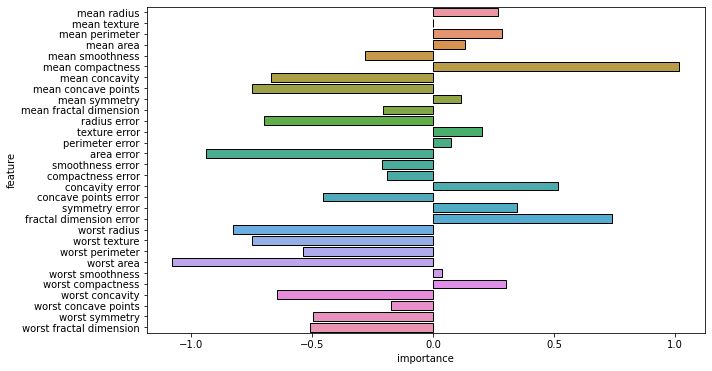

In [15]:
plt.figure(figsize = (10, 6))
sns.barplot(y = f_imp.feature, x = f_imp.importance, edgecolor = (0, 0, 0))
plt.show()

In [16]:
svc = SVC(random_state = 423, kernel = 'poly')
svc.fit(X1_train, y1_train)

SVC(kernel='poly', random_state=423)

In [17]:
pred = svc.predict(X1_test)

In [18]:
acc = accuracy_score(y1_test, pred)

In [19]:
acc

0.9210526315789473

***
#### 1-2. 회귀

In [20]:
data2 = pd.DataFrame(load_boston().data, columns = load_boston().feature_names)
data2['target'] = load_boston().target

In [21]:
data2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [22]:
X2 = data2.iloc[:, :-1]
y2 = np.array(data2.target)

In [23]:
scaler = StandardScaler()
scaled_X2 = scaler.fit_transform(X2)

In [24]:
X2_train, X2_test, y2_train, y2_test = train_test_split(scaled_X2, y2, test_size = .2, random_state = 423)

In [25]:
svr = SVR()
svr.fit(X2_train, y2_train)

SVR()

In [26]:
pred = svr.predict(X2_test)

In [27]:
mse = mean_squared_error(y2_test, pred)

In [28]:
mse

45.25817134238983

In [29]:
lsvr = LinearSVR(random_state = 423)
lsvr.fit(X2_train, y2_train)

LinearSVR(random_state=423)

In [30]:
pred = lsvr.predict(X2_test)

In [31]:
mse = mean_squared_error(y2_test, pred)

In [32]:
mse

41.362619714203525

***
### 2. 결정 트리(Decision Tree)

SVM 처럼 결정 트리는 분류와 회귀 작업 그리고 다중 출력 작업도 가능한 다재다능한 머신러닝 알고리즘이다. 데이터의 규칙을 학습을 통해서 자동으로 찾아내 **트리 기반**의 분류 규칙을 만든다. 일반적으로 스무고개와 같이 if/else 형태를 띄기 때문에 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 성능을 좌우한다. 

결정트리는 **루트노드**부터 **리프노드**까지 데이터로부터 생성한 규칙을 기준으로 예측을 결정하게 된다. 루트노드에서 시작하여 각 **규칙노드**로부터 **브랜치/서브 트리**를 생성하여 데이터를 분류하고 최종적으로 **리프노드**에서 결정값을 예측한다. 많은 규칙이 존재하는 경우 결정이 복잡해지고 이는 곧 **과적합**을 일으키기 쉽다. 

정보의 균일도를 측정하는 방법은 엔트로피를 활용한 **정보 이득 지수**와 **지니계수**가 있다. 정보이득은 **엔트로피**를 기반으로 하며 데이터의 **혼잡도**를 의미한다. 서로 다른 값이 섞여 있으면 엔트로피가 높고 같은 값이 섞여 있으면 엔트로피가 낮다. 이 때 정보 이득 지수는 (1 - 엔트로피 지수)이다. 지니계수는 0이 가장 평등하고 1로 갈수록 불공평ㅇ하다. 즉 다양성이 낮을수록 균일도가 높다는 의미로 1로 갈수록 지니 계수가 높은 속성을 기준으로 분할한다.

기대 집단의 사람들 중 가장 좋은 많응을 보일 **고객의 유치방안을 예측**하고자 하는 경우에는 **예측력에 치중**한다. 신용평가에서는 심사 결과 부적격 판정이 나온 경우 고객에게 부적격 **이유를 설명**해야 하므로 **해석력에 치중**한다.

**< 장점 >**
- 결과를 설명하기에 용이하다.
- 모형을 만드는 방법이 간단하다.
- 대용량 데이터에 빠르게 만들수 있다. 
- 비정상 잡음 데이터에 대해서도 민감함이 없이 분류가 가능하다.
- 상관성이 높인 변수가 있어도 크게 영향을 받지 않는다.
- 전처리가 거의 필요하지 않으며 스케일링 작업이 필요하지 않다.

**< 단점 >**
- 과대적합 가능성이 높다.
- 분류 경계선 부근의 자료값에 대해서 오차가 크다.
- 설명변수 간의 중요도를 판단하기 쉽지 않다.

**< 파라미터 >**
- min_samples_split : 노드를 분할하기 위한 최소 샘플 수
- min_samples_leaf : 리프 노드가 되기 위한 최소한의 샘플 데이터 수
- max_features : 최대 피처 개수, None이 디폴트로 모든 피처 사용
- max_depth : 트리의 최대 깊이
- max_leaf_nodes : 리프 노드의 최대 개수

#### 2-1. 분류

In [33]:
X1_train, X1_test, y1_train, y1_test = train_test_split(scaled_X1, y1, test_size = .2, random_state = 423)

In [34]:
dtc = DecisionTreeClassifier(random_state = 423)
dtc.fit(X1_train, y1_train)

DecisionTreeClassifier(random_state=423)

In [35]:
pred = dtc.predict(X1_test)

In [36]:
acc = accuracy_score(y1_test, pred)

In [37]:
acc

0.956140350877193

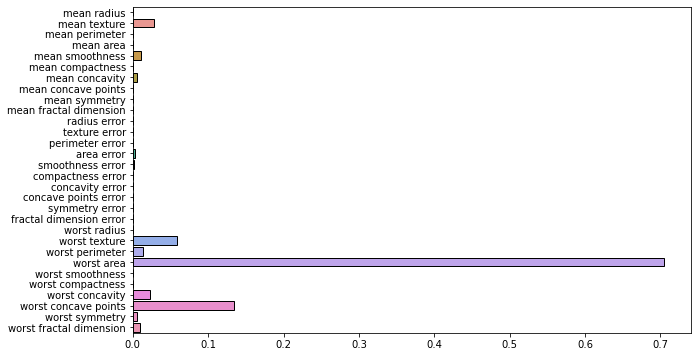

In [38]:
plt.figure(figsize = (10, 6))
sns.barplot(y = X1.columns.tolist(), x = dtc.feature_importances_, edgecolor = (0, 0, 0))
plt.show()

#### 2-2. 회귀

In [39]:
X2_train, X2_test, y2_train, y2_test = train_test_split(scaled_X2, y2, test_size = .2, random_state = 423)

In [40]:
dtr = DecisionTreeRegressor(random_state = 423)
dtr.fit(X2_train, y2_train)

DecisionTreeRegressor(random_state=423)

In [41]:
pred = dtr.predict(X2_test)

In [42]:
mse = mean_squared_error(y2_test, pred)

In [43]:
mse

13.10264705882353

***

### 3. 랜덤포레스트

랜덤포레스트는 **배깅** 방식이 사용되며 배깅은 같은 알고리즘으로 여러 개의 분류기를 만들어 보팅으로 최종 결정하는 알고리즘이다. 앙상블 알고리즘 중에서 비교적 빠른 수행 속도를 가지고 있으며 다양한 영역에서 좋은 성능을 보인다. 랜덤 포레스트의 기반 알고리즘은 결정 트리로서 결정 트리의 쉽고 직관적인 장점을 가진다. 

랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 된다. 또한 개별 트리가 학습하는 데이터는 전체 데이터에서 일부가 중첩되게 만든 데이터이다. 이렇게 여러 개의 데이터를 중첩되게 분리하는 것을 **부트스트래핑** 분할 방식이라고 한다.

트리 기반의 앙상블 알고리즘의 단점은 하이퍼 파라미터가 너무 많고 튜닝을 위한 시간이 많이 소모된다는 것이다.

**< 파라미터 >**
- n_estimators : 랜덤 포레스트의 결정 트리 개수, 디폴트는 10
- max_features 
- max_depth
#### 3-1. 분류

In [44]:
rfc = RandomForestClassifier(random_state = 423)
rfc.fit(X1_train, y1_train)

RandomForestClassifier(random_state=423)

In [45]:
pred = rfc.predict(X1_test)

In [46]:
acc = accuracy_score(y1_test, pred)

In [47]:
acc

0.9736842105263158

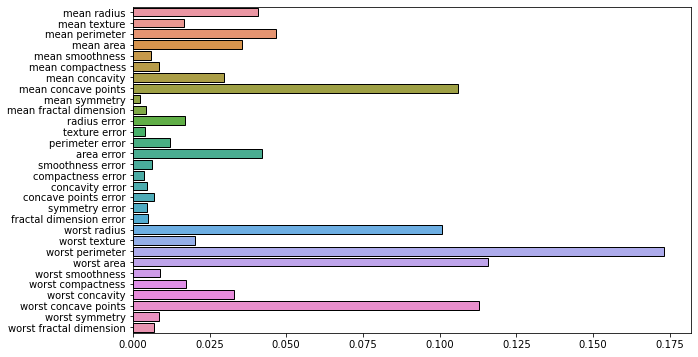

In [48]:
plt.figure(figsize = (10, 6))
sns.barplot(y = X1.columns.tolist(), x = rfc.feature_importances_, edgecolor = (0, 0, 0))
plt.show()

#### 3-2. 회귀

In [49]:
rfr = RandomForestRegressor(random_state = 423)
rfr.fit(X2_train, y2_train)

RandomForestRegressor(random_state=423)

In [50]:
pred = rfr.predict(X2_test)

In [51]:
mse = mean_squared_error(y2_test, pred)

In [52]:
mse

7.476536558823532

***
### 4. GradientBoosting

부스팅 알고리즘은 여러개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치를 부여해 오류를 개선해 나가면서 학습하는 방식이다. 그 중에서 GBM은 가중치 업데이트를 **경사 하강법**을 이용한다. 정의된 손실 함수를 기준으로 오차를 계산하고 트리 기반의 약한 학습기를 만들어 오차를 줄일 수 있도록 가중치를 갱신하여 학습을 진행한다.

In [53]:
gbc = GradientBoostingClassifier(random_state = 423)
gbc.fit(X1_train, y1_train)

GradientBoostingClassifier(random_state=423)

In [54]:
pred = gbc.predict(X1_test)

In [55]:
acc = accuracy_score(y1_test, pred)

In [56]:
acc

0.9649122807017544

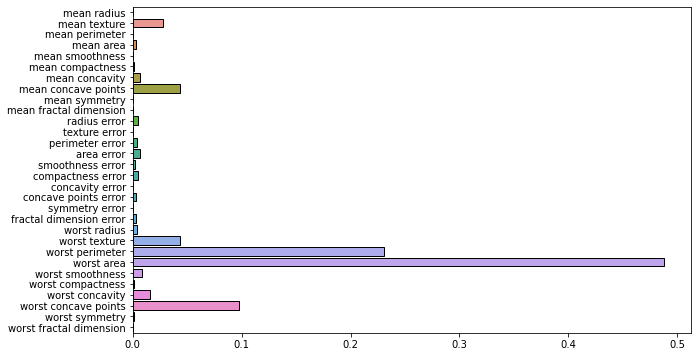

In [57]:
plt.figure(figsize = (10, 6))
sns.barplot(y = X1.columns.tolist(), x = gbc.feature_importances_, edgecolor = (0, 0, 0))
plt.show()

#### 3-2. 회귀

In [58]:
gbr = GradientBoostingRegressor(random_state = 423)
gbr.fit(X2_train, y2_train)

GradientBoostingRegressor(random_state=423)

In [59]:
pred = gbr.predict(X2_test)

In [60]:
mse = mean_squared_error(y2_test, pred)

In [61]:
mse

7.167581637246952

***
### 5. XGBoost

XGBoost는 여러개의 의사결정나무를 조합해서 사용하는 앙상블 알고리즘으로 GBM에 기반하고 있지만 느린 수행 시간 및 과적합 규제 부재 등의 문제를 해결하였다. 특히 병렬 CPU 환경에서 병렬 학습이 가능해 기존 GBM보다 빠르게 학습을 할 수 있다. 

**< 장점 >**
- 뛰어난 예측 성능
- GBM 대비 빠른 수행 시간
- 과적합 규제
- 나무 가지치기 : 가지치기로 긍정 이득이 더 이상 없는 분할은 분할 수를 더 줄이는 장점이 있다.
- 자체 내장된 교차 검증 
- 결손값 자체 처리

**< 파라미터 >**
- max_depth
- objective
- eval_metric
- learning_rate
- subsample
- etc.

In [62]:
xgbc = XGBClassifier(random_state = 423)
xgbc.fit(X1_train, y1_train)

[11:50:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=423,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
pred = xgbc.predict(X1_test)

In [64]:
acc = accuracy_score(y1_test, pred)

In [65]:
acc

0.9736842105263158

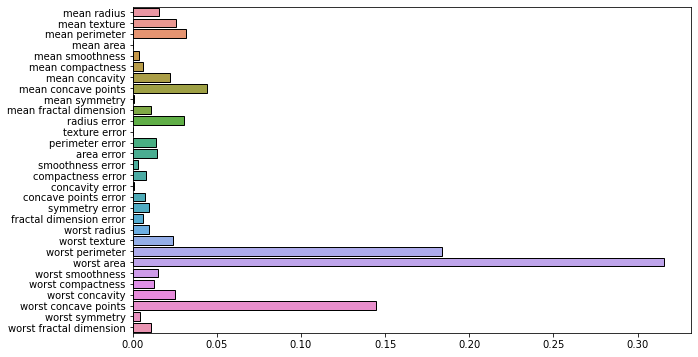

In [66]:
plt.figure(figsize = (10, 6))
sns.barplot(y = X1.columns.tolist(), x = xgbc.feature_importances_, edgecolor = (0, 0, 0))
plt.show()

#### 3-2. 회귀

In [67]:
xgbr = XGBRegressor(random_state = 423)
xgbr.fit(X2_train, y2_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=423,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
pred = xgbr.predict(X2_test)

In [69]:
mse = mean_squared_error(y2_test, pred)

In [70]:
mse

9.047773654375034

***
### 6. LGBM

LightGBM은 XGBoost 보다 학습에 걸리는 시간이 훨씬 적고 메모리 사용량도 상대적으로 적다. 단점으로는 작은 데이터에 적용할 경우 과대적합이 발생하기 쉽다는 것이다. 일반 GBM 계열과 다르게 **리프 중심 트리 분할** 방식을 사용한다. 대부분 트리 기반 알고리즘은 트리의 깊이를 효과적으로 줄이기 위한 **균형 트리 분할 방식**을 사용한다. 즉 최대한 균형 잡힌 트리를 유지하면서 분할하기 때문에 트리의 깊이가 최소활 될 수 있다. 균형 잡힌 트리를 생성하는 이유는 오버피팅에 보다 더 강한 구조를 가질 수 있다고 알려져 있기 때문인데 반대로 균형을 맞추기 위해 시간이 필요하다는 상대적인 단점이 있다. 하지만 LightGBM의 리프 중심 트리 분할 방식은 트리의 균형을 맞추지 않고 최대 손실 값을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성된다. 

**< 장점 >**
- 더 빠른 학습과 예측 수행시간
- 더 작은 메모리 사용량
- 카테고리형 피처의 자동 변환과 최적 분할

**< 파라미터 >**
- max_depth
- objective
- boosting
- learning_rate
- n_estimators
- subsample
- etc.

In [71]:
lgbc = LGBMClassifier(random_state = 423)
lgbc.fit(X1_train, y1_train)

LGBMClassifier(random_state=423)

In [72]:
pred = lgbc.predict(X1_test)

In [73]:
acc = accuracy_score(y1_test, pred)

In [74]:
acc

0.9912280701754386

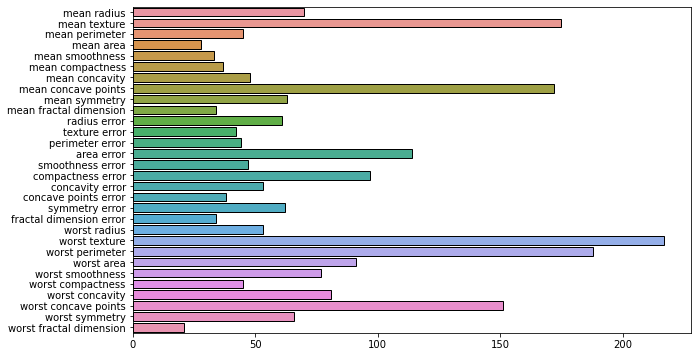

In [75]:
plt.figure(figsize = (10, 6))
sns.barplot(y = X1.columns.tolist(), x = lgbc.feature_importances_, edgecolor = (0, 0, 0))
plt.show()

#### 3-2. 회귀

In [76]:
lgbr = LGBMRegressor(random_state = 423)
lgbr.fit(X2_train, y2_train)

LGBMRegressor(random_state=423)

In [77]:
pred = lgbr.predict(X2_test)

In [78]:
mse = mean_squared_error(y2_test, pred)

In [79]:
mse

13.002127736783153

***
### 7. Naive Bayes

**베이즈 정리**의 **조건부 독립을 가정**하는 알고리즘으로 클래스에 대한 서전 정보와 데이터로부터 추출된 정보를 결합하고 베이즈 정리를 이용하여 클래스 분류. 

**< 장점 >**
- 간단하고 빠르며 효율적인 알고리즘이다.
- 잡음과 누락 데이터를 잘 처리한다.
- 훈련을 할 때 데이터의 크기에 상관 없이 잘 동작한다.
- 예측을 위한 추정 확률을 쉽게 얻을 수 있다.

**< 단점 >**
- 모든 특징이 동등하게 중요하고, 독립이라는 가정이 잘못된 경우가 자주 있다. (ex: 텍스트의 단어들, 일기예보를 할 때 습도와 같은 중요한 특징을 다른 특징과 동등하다 판단)
- 수치 특징이 많은 데이터셋에는 이상적이지 않다. 
- 추정된 확률이 예측된 클래스보다 덜 신뢰할만하다.

**< 활용 분야 >**
- 스팸 필터링
- 대중적으로 나이브베이즈의 활용에 가장 많이 알려진 것이 스팸 필터링이다.
- 이진 분류(binary classification)
 
- 비정상적인 상황 감지
- 컴퓨터 네트워크 침입이나 비정상 행위 등을 탐지
- 이진 분류(binary classification)
 
- 의학적 질병 진단
- 종양의 크기, 환자의 나이 등등을 여부로 암 여부를 진단하는 등의 질병을 진단할 수 있음
- 이진 분류(binary classification)
 
- 문서 분류
- 문서 데이터를 읽고, 스포츠, 정치, 연예 등의 문서로 분류
- 다중 분류(multi-class classification

In [80]:
gnb = GaussianNB()
gnb.fit(X1_train, y1_train)

GaussianNB()

In [81]:
pred = gnb.predict(X1_test)

In [82]:
acc = accuracy_score(y1_test, pred)

In [83]:
acc

0.9473684210526315

***
### 8. KNN

KNN은 새로운 데이터의 클래스를 해당 데이터와 가장 가까운 k개 데이터들의 클래스로 결정한다. 유클리디안, 맨하탄, 민코우스키 등 다양한 거리 함수를 사용할 수 있고 대표적으로 유클리디안 거리를 사용한다.

k의 선택은 일반적으로 훈련데이터의 개수의 제곱근으로 설정한다. 너무 크게 설정할 경우 클러스터링이 잘 이루어지지 않고 너무 작게할 경우 이상치 혹은 잡음 데이터와 이웃이 될 가능성이 있어 적절한 k의 선택이 중요하다.

**< 장점 >**
- 사용이 간단하다.
- 범주를 나눈 기준을 몰라도 데이터를 분류할 수 있다.
- 추가된 데이터의 처리가 용이하다.

**< 단점 >**
- k값의 결정이 어렵다.
- 비수치 데이터의 경우 유사도를 정의하기 어렵다.
- 이상치가 존재하면 성능에 큰 영향을 끼친다.

In [90]:
knnc = KNeighborsClassifier(metric= 'euclidean')
knnc.fit(X1_train, y1_train)

KNeighborsClassifier(metric='euclidean')

In [91]:
pred = knnc.predict(X1_test)

In [92]:
acc = accuracy_score(y1_test, pred)

In [93]:
acc

0.9912280701754386

In [95]:
knnr = KNeighborsRegressor(metric = 'euclidean')
knnr.fit(X2_train, y2_train)

KNeighborsRegressor(metric='euclidean')

In [96]:
pred = knnr.predict(X2_test)

In [97]:
mse = mean_squared_error(y2_test, pred)

In [98]:
mse

24.43575294117647

***
### 9. Voting

보팅은 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 방식이다. 그 중에서 하드 보팅은 다수결 원칙을 기반으로 하고 소프트 보팅은 레이블 값 결정 확률을 모두 더하고 이를 평균하여 가장 높은 확률의 클래스를 결과로 선정한다.

In [103]:
votc = VotingClassifier(estimators = [('lgbm', lgbc), ('xgb', xgbc), ('gbm', gbc)], voting = 'soft')
votc.fit(X1_train, y1_train)

[12:11:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('lgbm', LGBMClassifier(random_state=423)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=8,
                                            num_parallel_tree=1,
                            

In [104]:
pred = votc.predict(X1_test)

In [105]:
acc = accuracy_score(y1_test, pred)

In [106]:
acc

0.9649122807017544

In [110]:
votr = VotingRegressor(estimators = [('lgbm', lgbr), ('xgb', xgbr), ('gbm', gbr)])
votr.fit(X2_train, y2_train)

VotingRegressor(estimators=[('lgbm', LGBMRegressor(random_state=423)),
                            ('xgb',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=8,
                                          num_parallel_tree=1, random_state=423,
                                     

In [112]:
pred = votr.predict(X2_test)

In [113]:
mse = mean_squared_error(y2_test, pred)

In [114]:
mse

8.170393848174044

***
### 10. Stacking

스태킹은 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행한다. 즉 개별 알고리즘의 예측 결과 데이터를 최종적인 메타 데이터로 만들어 별도의 ML알고리즘으로 최종 학습을 수행하고 예측을 수행하는 방식이다.

In [115]:
est = [('lgb', lgbc), ('xgb', xgbc), ('gbc', gbc), ('knn', knnc), ('rf', rfc), ('gb', gnb)]

In [116]:
clf = StackingClassifier(estimators = est, final_estimator = dtc)

In [117]:
clf.fit(X1_train, y1_train)

[12:17:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

StackingClassifier(estimators=[('lgb', LGBMClassifier(random_state=423)),
                               ('xgb',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              gpu_id=-1, importance_type='gain',
                                              interaction_constraints='',
                                              learning_rate=0.300000012,
                                              max_delta_step=0, max_depth=6,
                                              min_child_weight=1, missing=nan,
                                              monotone_cons...
                                              random_state=423, reg_alpha=0,
                                              reg_lambda=1, scale_pos_weigh

In [124]:
pred = clf.predict(X1_test)

In [125]:
acc = accuracy_score(y1_test, pred)

In [126]:
acc

0.9736842105263158